In [1]:
# EXAMPLE LINK: https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=AAPL&outputsize=full&apikey=XU0S88ZM101LB0FQ&datatype=csv

# Import neccesary modules and packages #
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive

#Notify everything's OK!
print("Downloading data...\n")

# SET ATTRIBUTES FOR DATA FETCH #
apikey = "XU0S88ZM101LB0FQ" 
outputsize = "full" # Compact or full, if daily data. Compact is 100 days, full is 20+ years.
tickers = ["AAPL","BA","AIG","MSFT", "TSLA"] # Maximum of five stocks per data fetch and only one data fetch per minute allowed
freq = "DAILY" # DAILY, WEEKLY OR MONTHLY

# Empty Panda DataFrame to append individual stock data to 
stocks_df = pd.DataFrame() 

# Loop through tickercodes and fetch data individually, then append to stocks_df
for ticker in tickers:
    fetch_link = "https://www.alphavantage.co/query?function=TIME_SERIES_" + freq + "_ADJUSTED&symbol=" + ticker + "&outputsize=" + outputsize + "&apikey=" + apikey + "&datatype=csv"
    df = pd.read_csv(fetch_link)
    df["ticker"] = ticker
    print(ticker + " OK! Mean close is " + str(round(df.close.mean(),2)) + ".")
    stocks_df = stocks_df.append(df,ignore_index=True)
print("\nAll data downloaded!")


AAPL OK! Mean close is 158.49.
BA OK! Mean close is 95.4.
AIG OK! Mean close is 59.78.
MSFT OK! Mean close is 49.71.
TSLA OK! Mean close is 176.24.

All data downloaded!


In [2]:
def graph(ticker,days,adjusted):
    get_stock=stocks_df.loc[stocks_df['ticker'] == ticker, :]
    get_stock=get_stock.iloc[0:days]
    get_stock = get_stock[::-1] # Reverses order of dataframe
    get_stock = get_stock.reset_index() # Re-indexes
    #plt.figure(figsize=(7,5))
    plt.plot(get_stock['timestamp'], get_stock['adjusted_close'] if adjusted == True else get_stock['close'])
    plt.title(ticker)
    # HERUNDER LAVES X-AKSEN
    #SLET IKKE DENNE KOMMENTAR: first_day_of_month = stocks_df.loc[get_stock['timestamp'].str[-2:] == "01", :].index.tolist()
    if (days < 90):
        every_x_day = round(days/22+0.5)
        trading_days = get_stock.iloc[0:days].index.tolist()
        ticks = trading_days[::every_x_day]
        timestamp_values = get_stock["timestamp"][ticks] 
    elif (days <= 360):
        first_trading_day_of_month = get_stock.loc[get_stock['timestamp'].str[-2:] < get_stock['timestamp'].str[-2:].shift(periods=1),:].index.tolist()
        ticks = first_trading_day_of_month
        timestamp_values = get_stock["timestamp"].str[:7][ticks]
    else:
        first_trading_day_of_year = get_stock.loc[get_stock['timestamp'].str[:4] > get_stock['timestamp'].str[:4].shift(periods=1),:].index.tolist()
        ticks = first_trading_day_of_year
        timestamp_values = get_stock["timestamp"].str[:4][ticks]
    plt.xticks(ticks,timestamp_values)
    plt.xticks(rotation=90)
    plt.show()
print("Function to draw graph succesfully defined.")

Function to draw graph succesfully defined.


In [3]:
interactive_plot = interactive(graph, days=[('One week', 7), 
                      ('Two weeks', 14), 
                      ('One month', 30), 
                      ('Two months', 60), 
                      ('Three months', 90), 
                      ('Half year', 180), 
                      ('One year', 360), 
                      ('Two years', 720), 
                      ('Five years', 1800), 
                      ('10 years', 3600), 
                      ('All time', 999999999)],
                adjusted=[('False',False),('True',True)],
                ticker=tickers);
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(Dropdown(description='ticker', options=('AAPL', 'BA', 'AIG', 'MSFT', 'TSLA'), value='AAP…

In [11]:
df_p=stocks_df.copy() #Makes a copy of main dataframe
df_p = df_p[::-1] # Reverses order of dataframe
df_p['return']=df_p['adjusted_close'].pct_change() #calculate daily return
df_r = pd.DataFrame() #Creates new dataframe with the returns
x=df_p.loc[df_p['ticker']=='AAPL','timestamp']  #Getting timestamp
df_r['timestamp']=x
for company in tickers:
    x=df_p.loc[df_p['ticker']==company,'return'].values #Getting all return values for the company
    if len(x)==len(df_r['timestamp']): #Checking whether the company has been listed during the whole period
        df_r[company]=x
        df_r.set_index('timestamp', drop=True, append=False, inplace=False, verify_integrity=False)
df_r.set_index('timestamp', drop=True, append=False, inplace=False, verify_integrity=False)        

,AAPL,BA,AIG,MSFT
timestamp,,,,
1998-01-02,-0.998674,-0.283918,3.610310,-0.963402
1998-01-05,-0.022732,-0.005115,-0.006358,-0.005712
1998-01-06,0.192701,-0.015422,-0.004570,0.005745
1998-01-07,-0.075992,0.005219,-0.009183,-0.011967
1998-01-08,0.039483,-0.036360,-0.005561,0.007250
1998-01-09,0.000000,-0.026949,-0.038211,-0.026815
1998-01-12,0.003151,0.005541,-0.019380,0.019684
1998-01-13,0.068574,-0.007053,-0.001976,0.020309
1998-01-14,0.012900,0.026409,-0.003960,-0.007574


In [12]:
df_r1=df_r.copy() #Makes sure that this cell runs without having to refresh
df_r1=df_r1[1:] #Removing first obs. which is NaN value (can't find pct. change for first observation)

NameError: name 'liste' is not defined

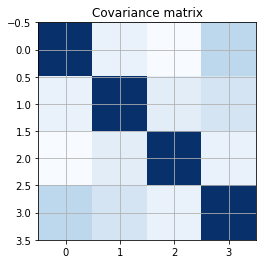

In [10]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('Blues', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Covariance matrix')
    labels=[liste[0],liste[1],liste[2],liste[3]]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0,.25,.5,.75,1])
    plt.show()

correlation_matrix(df_r1)

In [13]:
liste=list(df_r1.columns.values)
liste=liste[1:]
table=pd.DataFrame(index=['ann. return', 'std', 'sharpe ratio'], columns=liste)
table
for l in liste:
    table[l]['std']=df_r1[l].std()
table

,AAPL,BA,AIG,MSFT
ann. return,NaN,NaN,NaN,NaN
std,0.0269652,0.0194705,0.0359655,0.0197057
sharpe ratio,NaN,NaN,NaN,NaN


In [14]:
for l in liste:
    x=stocks_df.loc[df_p['ticker']==l,'adjusted_close'].values
    x=(x[0]/x[-1])**(1/20)-1
    table[l]['ann. return']=x
table

,AAPL,BA,AIG,MSFT
ann. return,0.346323,0.133449,-0.119016,0.128563
std,0.0269652,0.0194705,0.0359655,0.0197057
sharpe ratio,NaN,NaN,NaN,NaN


In [15]:
for l in liste:
    table[l]['sharpe ratio']=table[l]['ann. return']/table[l]['std']
table

,AAPL,BA,AIG,MSFT
ann. return,0.346323,0.133449,-0.119016,0.128563
std,0.0269652,0.0194705,0.0359655,0.0197057
sharpe ratio,12.8433,6.85391,-3.30915,6.52415
